In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta 

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [27]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [29]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [30]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [32]:
# Find the most recent date in the data set.

most_recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
print(most_recent_date)



('2017-08-23',)


Date one year from the last date: 2016-08-23 00:00:00


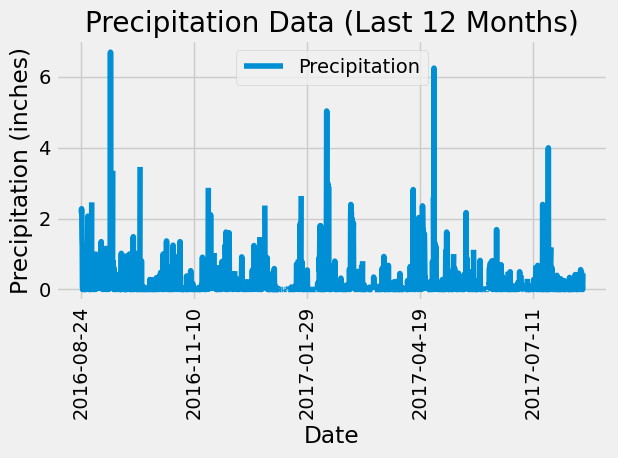

In [82]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in the data set
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = datetime.strptime(most_recent_date, '%Y-%m-%d')
last_year_date = most_recent_date - timedelta(days=365)
print("Date one year from the last date:", last_year_date)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp)\
                .filter(Measurement.date >= last_year_date)\
                .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
scores_df = pd.DataFrame(scores, columns=["Date", "Precipitation"])

# Sort the DataFrame by date
scores_df = scores_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
scores_df.plot(kind='line', x="Date", y="Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation Data (Last 12 Months)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [43]:
# Use Pandas to calculate the summary statistics for the precipitation data
scores_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Station).filter_by(station=Station.station).count()
print(station_count)


9


In [76]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
                               group_by(Measurement.station).order_by(desc(func.count(Measurement.station)))

for station, count in active_station:
    print (station, count)


USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()

NameError: name 'session' is not defined